# Heart Disease Prediction

In this machine learning project, I have collected the dataset and I will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import libraries

Let's first import all the necessary libraries. I'll use `numpy` and `pandas` to start with. For visualization, I will use `pyplot` subpackage of `matplotlib`, use `rcParams` to add styling to the plots and `rainbow` for colors. For implementing Machine Learning models and processing of data, I will use the `sklearn` library.

In [3]:
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn.metrics import accuracy_score

For processing the data, I'll import a few libraries. To split the available dataset for testing and training, I'll use the `train_test_split` method. To scale the features, I am using `StandardScaler`.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Next, I'll import all the Machine Learning algorithms I will be using.
1. K Neighbors Classifier
2. Support Vector Classifier
3. Decision Tree Classifier
4. Random Forest Classifier

In [5]:
from sklearn.neighbors import KNeighborsClassifier

### Import dataset

Now that we have all the libraries we will need, I can import the dataset and take a look at it. The dataset is stored in the file `dataset.csv`. I'll use the pandas `read_csv` method to read the dataset.

In [8]:
dataset = pd.read_csv(r'/content/drive/MyDrive/MINI PROJECT I (heart disease prediction)/heart.csv')

The dataset is now loaded into the variable `dataset`. I'll just take a glimpse of the data using the `desribe()` and `info()` methods before I actually start processing and visualizing it.

In [9]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
dataset.shape

(303, 14)

In [11]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Looks like the dataset has a total of 303 rows and there are no missing values. There are a total of `13 features` along with one target value which we wish to find.

In [14]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The scale of each feature column is different and quite varied as well. While the maximum for `age` reaches 77, the maximum of `chol` (serum cholestoral) is 564.

## Grouping Data

In [15]:
dataset.groupby('cp').size()

cp
0    143
1     50
2     87
3     23
dtype: int64

In [16]:
dataset.groupby('target').size()

target
0    138
1    165
dtype: int64

In [17]:
dataset.groupby('target').sum()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,7811,114,66,18547,34650,22,62,19196,76,218.8,161,161,351
1,8662,93,227,21335,39968,23,98,26147,23,96.2,263,60,350


### Understanding the data

Now, we can use visualizations to better understand our data and then look at any processing we might want to do.

In [ ]:
numeric_columns=['trestbps','chol','thalach','age','oldpeak']
sns.pairplot(dataset[numeric_columns])

#  Correlation heatmap

In [ ]:
sns.heatmap(dataset[numeric_columns].corr(),annot=True,cmap='terrain',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

Taking a look at the correlation matrix above, it's easy to see that a few features have negative correlation with the target value while some have positive.
Next, I'll take a look at the histograms for each variable.

In [ ]:
dataset.hist()
plt.tight_layout()

Taking a look at the histograms above, I can see that each feature has a different range of distribution. Thus, using scaling before our predictions should be of great use. Also, the categorical features do stand out.

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

Text(0.5, 1.0, 'Count of each Target Class')

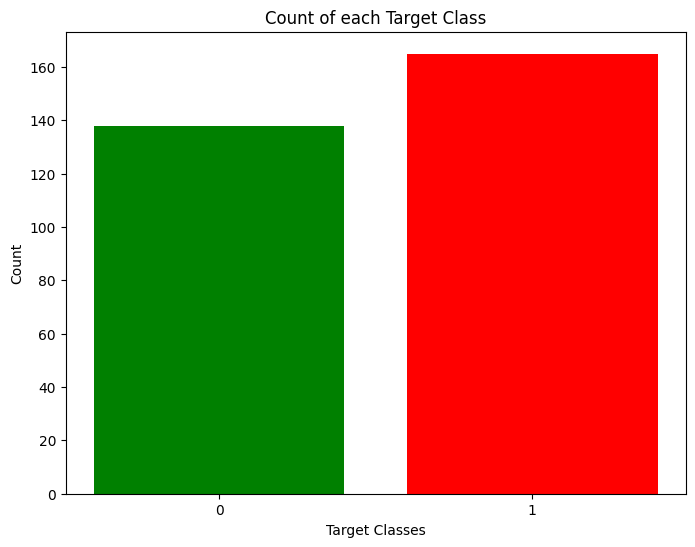

In [21]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

The two classes are not exactly 50% each but the ratio is good enough to continue without dropping/increasing our data.

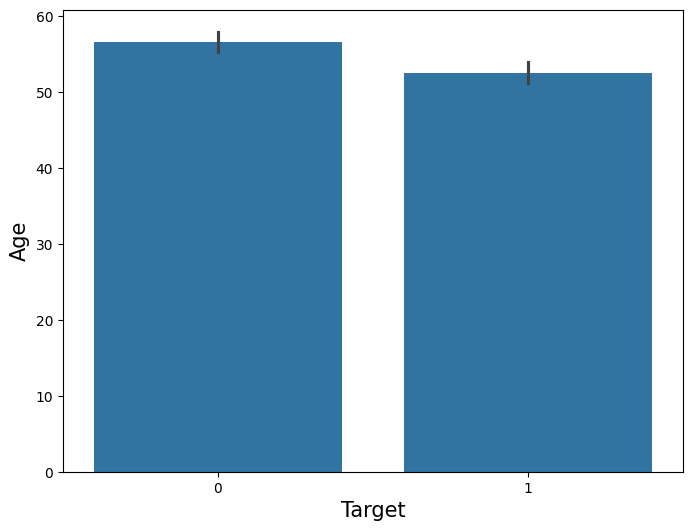

In [22]:
sns.barplot(x="target", y="age",data=dataset)
plt.xlabel('Target',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.show()

Text(0, 0.5, 'Age')

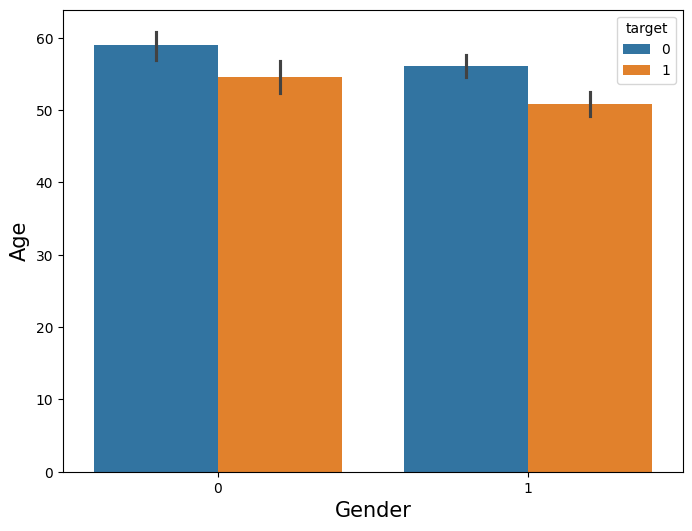

In [24]:
sns.barplot(x=dataset['sex'],y=dataset['age'],hue=dataset['target'])
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Age',fontsize=15)

In [ ]:
sns.pairplot(dataset,hue='target')

### Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

Taking a look at the correlation matrix above, it's easy to see that a few features have negative correlation with the target value while some have positive.
Next, I'll take a look at the histograms for each variable.

In [27]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

Now, I will use the `StandardScaler` from `sklearn` to scale my dataset.

In [28]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

The data is not ready for our Machine Learning application.

### Machine Learning

I'll now import `train_test_split` to split our dataset into training and testing datasets. Then, I'll import all Machine Learning models I'll be using to train and test the data.

In [29]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

#### K Neighbors Classifier

The classification score varies based on different values of neighbors that we choose. Thus, I'll plot a score graph for different values of K (neighbors) and check when do I achieve the best score.

In [30]:
knn_scores = []
knn_con=[]
from sklearn.metrics import confusion_matrix
for k in range(1,11):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))
    y_pred=knn_classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)#confusion matrix for each K value
    knn_con.append(cm)
print(knn_scores)

[0.76, 0.78, 0.86, 0.84, 0.83, 0.86, 0.84, 0.87, 0.84, 0.85]


I have the scores for different neighbor values in the array `knn_scores`. I'll now plot it and see for which value of K did I get the best scores.

Text(0, 0.5, 'Scores')

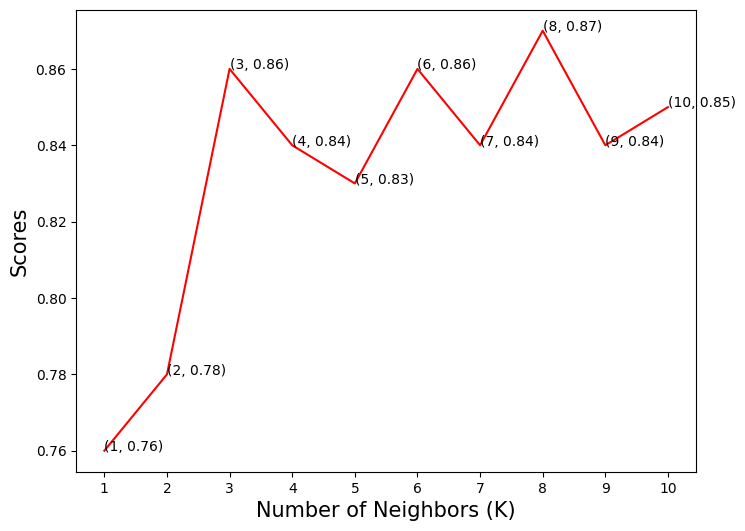

In [31]:
plt.plot([k for k in range(1, 11)], knn_scores, color = 'red')
for i in range(1,11):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]),fontsize=10)
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Number of Neighbors (K)',fontsize=15)
plt.ylabel('Scores',fontsize=15)

In [48]:
# Example of new data with consistent preprocessing
new_data = pd.DataFrame({
    'age': [55],
    'sex': [1],
    'cp_0': [0],  # Assuming cp=1 for this data point
    'cp_1': [1],
    'cp_2': [0],
    'cp_3': [0],
    'trestbps': [140],
    'chol': [260],
    'fbs': [0],
    'restecg': [0],
    'thalach': [140],
    'exang_0': [1],  # Assuming exang=0 for this data point
    'exang_1': [0],
    'oldpeak': [1.0],
    'slope_0': [0],
    'slope_1': [0],
    'slope_2': [1],
    'ca_0': [1],
    'ca_1': [0],
    'ca_2': [0],
    'ca_3': [0],
    'ca_4': [0],
    'thal_0': [0],
    'thal_1': [0],
    'thal_2': [1],
    'thal_3': [0]
})

new_data['fbs_0'] = 0
new_data['fbs_1'] = 0
new_data['restecg_0'] = 0
new_data['restecg_1'] = 0
new_data['restecg_2'] = 0
# Modify the `new_data` DataFrame to match the feature names used during fitting

# Predict the label for the new data using the trained KNN classifier
new_data_predictions = knn_classifier.predict(new_data)

print(new_data_predictions)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- fbs
- restecg
- sex
Feature names seen at fit time, yet now missing:
- sex_0
- sex_1
